In [210]:
import snapatac2 as snap
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
snap.__version__

In [211]:
fragment_file = "/SGRNJ06/randd/USER/cjj/celedev/atac/20240228_1ds/downsample_R231009018/03.atac/downsample_R231009018/outs/fragments.tsv.gz"

In [212]:
%%time
data = snap.pp.import_data(
    fragment_file,
    chrom_sizes=snap.genome.mm10,
    # file="pbmc.h5ad",  # Optional
    sorted_by_barcode=False,
)
#data

CPU times: user 45.3 s, sys: 5.31 s, total: 50.6 s
Wall time: 41.2 s


2024-04-15 17:12:51 - INFO - Computing fragment size distribution...


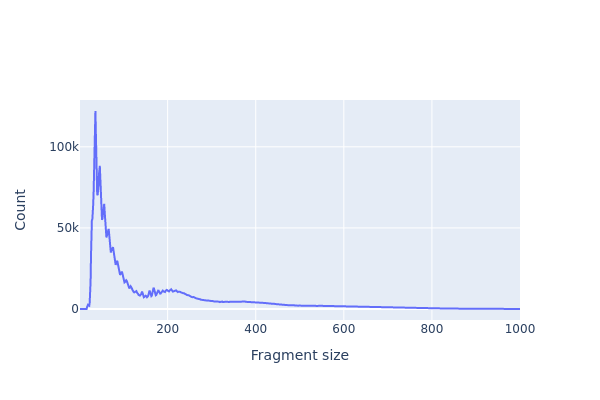

In [213]:
snap.pl.frag_size_distr(data, interactive=False)

In [ ]:
fig = snap.pl.frag_size_distr(data, show=False)
#fig.update_yaxes(type="log")
fig.update_yaxes()
fig.show()

In [214]:
%%time
snap.metrics.tsse(data, snap.genome.mm10)

CPU times: user 12.8 s, sys: 2.47 s, total: 15.2 s
Wall time: 1.76 s


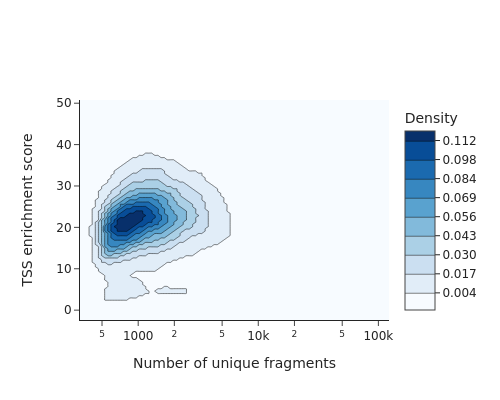

In [215]:
snap.pl.tsse(data, interactive=False)

In [220]:
np.mean(data.obs.tsse)

22.379308795049138

In [217]:
raw_data = data.copy()

In [218]:
%%time
snap.pp.filter_cells(data, min_counts=500, min_tsse=10, max_counts=100000)
data

CPU times: user 65.7 ms, sys: 84.1 ms, total: 150 ms
Wall time: 149 ms


AnnData object with n_obs × n_vars = 4210 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr'
    obsm: 'fragment_paired'

In [ ]:
data.obs

In [ ]:
%%time
snap.metrics.frip(data, {"peaks_frac": snap.datasets.cre_HEA()})

In [ ]:
data.obs

In [ ]:
np.mean(data.obs.peaks_frac)

In [221]:
%%time
snap.pp.add_tile_matrix(data)

CPU times: user 7.66 s, sys: 1.56 s, total: 9.22 s
Wall time: 4.77 s


In [222]:
data

AnnData object with n_obs × n_vars = 4210 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr'
    obsm: 'fragment_paired'

In [223]:
snap.pp.select_features(data, n_features=250000)

2024-04-15 17:14:03 - INFO - Selected 250000 features.


In [224]:
data

AnnData object with n_obs × n_vars = 4210 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr'
    obsm: 'fragment_paired'

In [225]:
%%time
snap.pp.scrublet(data)

2024-04-15 17:14:10 - INFO - Simulating doublets...
2024-04-15 17:14:10 - INFO - Spectral embedding ...
2024-04-15 17:15:04 - INFO - Calculating doublet scores...


CPU times: user 4min 17s, sys: 2min 21s, total: 6min 39s
Wall time: 58.1 s


In [230]:
snap.pp.filter_doublets(data)
data

2024-04-15 17:17:11 - INFO - Detected doublet rate = 1.591%


AnnData object with n_obs × n_vars = 4143 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'scrublet_sim_doublet_score', 'doublet_rate'
    obsm: 'fragment_paired'

In [231]:
%%time
snap.tl.spectral(data)

CPU times: user 15.1 s, sys: 614 ms, total: 15.7 s
Wall time: 15 s


In [232]:
%%time
snap.tl.umap(data)

CPU times: user 16.1 s, sys: 264 ms, total: 16.4 s
Wall time: 13.2 s


In [233]:
%%time
snap.pp.knn(data)
snap.tl.leiden(data)

CPU times: user 1.07 s, sys: 67.3 ms, total: 1.13 s
Wall time: 212 ms


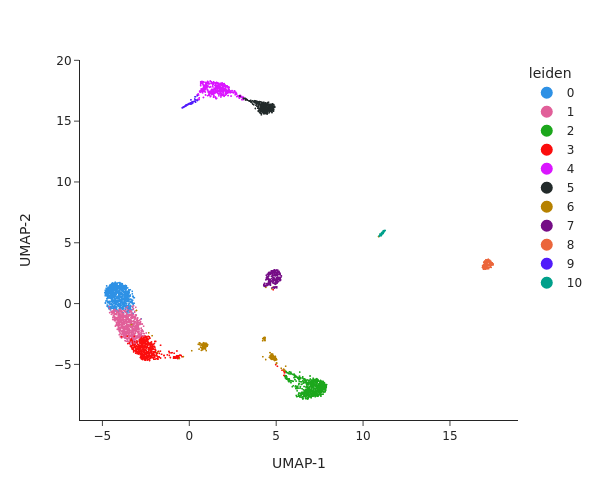

In [234]:
snap.pl.umap(data, color='leiden', interactive=False, height=500)

In [ ]:
data

In [ ]:
data.obs

In [237]:
%%time
snap.tl.macs3(data, groupby='leiden')

2024-04-15 17:18:25 - INFO - Exporting fragments...
2024-04-15 17:18:28 - INFO - Calling peaks...
100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [00:31<00:00,  2.82s/it]

CPU times: user 10.8 s, sys: 10.7 s, total: 21.5 s
Wall time: 42.7 s


In [ ]:
data.uns['macs3']

In [238]:
peaks = snap.tl.merge_peaks(data.uns['macs3'], snap.genome.mm10)
peaks.head()

Peaks,0,1,6,3,8,2,9,5,7,10,4
str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
"""chr1:3123435-3…",false,false,false,false,false,false,false,false,true,false,false
"""chr1:3201178-3…",false,true,false,false,false,false,false,false,false,false,false
"""chr1:3596956-3…",false,false,false,false,false,false,true,false,false,false,false
"""chr1:4490415-4…",false,false,false,false,false,false,false,false,false,true,false
"""chr1:4571623-4…",false,false,false,false,false,false,false,false,false,false,true


In [239]:
peak_mat = snap.pp.make_peak_matrix(data, use_rep=peaks['Peaks'])
peak_mat

AnnData object with n_obs × n_vars = 4143 × 93994
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'

In [ ]:
peak_mat

In [ ]:
peak_mat.obs

In [ ]:
data

In [ ]:
data.obs

In [240]:
df_peak = peak_mat.to_df().T
df = data.to_df().T

In [241]:
df

,GACTAGTAGAAACGCC-1,GACTAGTAGAAAGCAG-1,GACTAGTAGAAAGGGT-1,GACTAGTAGAAATACC-1,GACTAGTAGAAATCTG-1,GACTAGTAGAAATGGG-1,GACTAGTAGAAATTCG-1,GACTAGTAGAACAGGA-1,GACTAGTAGAACCATA-1,GACTAGTAGAACCCGA-1,...,GGTGTCGTCTTCGTTA-1,GGTGTCGTCTTCTCTC-1,GGTGTCGTCTTCTTCC-1,GGTGTCGTCTTGCGCT-1,GGTGTCGTCTTGGCCT-1,GGTGTCGTCTTGTACT-1,GGTGTCGTCTTGTCAT-1,GGTGTCGTCTTGTCGC-1,GGTGTCGTCTTTATCG-1,GGTGTCGTCTTTCGAT-1
chr1:0-500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:500-1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:1000-1500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:1500-2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:2000-2500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:171029000-171029500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX:171029500-171030000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX:171030000-171030500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX:171030500-171031000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
df_peak

,GACTAGTAGAAACGCC-1,GACTAGTAGAAAGCAG-1,GACTAGTAGAAAGGGT-1,GACTAGTAGAAATACC-1,GACTAGTAGAAATCTG-1,GACTAGTAGAAATGGG-1,GACTAGTAGAAATTCG-1,GACTAGTAGAACAGGA-1,GACTAGTAGAACCATA-1,GACTAGTAGAACCCGA-1,...,GGTGTCGTCTTCGTTA-1,GGTGTCGTCTTCTCTC-1,GGTGTCGTCTTCTTCC-1,GGTGTCGTCTTGCGCT-1,GGTGTCGTCTTGGCCT-1,GGTGTCGTCTTGTACT-1,GGTGTCGTCTTGTCAT-1,GGTGTCGTCTTGTCGC-1,GGTGTCGTCTTTATCG-1,GGTGTCGTCTTTCGAT-1
chr1:3123435-3123936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:3201178-3201679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:3596956-3597457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:4490415-4490916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:4571623-4572124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:90799121-90799622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:90800512-90801013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:90805589-90806090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:90807485-90807986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_peak_final = df_peak.apply(lambda x: x.sum(), axis=1)

In [ ]:
pd.DataFrame(df_peak_final)

In [ ]:
np.median(data.obs.n_fragment)

In [236]:
data

AnnData object with n_obs × n_vars = 4143 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral', 'X_umap'
    obsp: 'distances'

In [227]:
raw_data.obs

,n_fragment,frac_dup,frac_mito,tsse
ACTAGGTAGAAACGCC-1,396,0.209581,0.0,19.354839
ACTAGGTAGAAAGCAG-1,326,0.212560,0.0,14.876033
ACTAGGTAGAAAGGGT-1,213,0.216912,0.0,10.606061
ACTAGGTAGAAATCTG-1,399,0.214567,0.0,15.151515
ACTAGGTAGAAATGGG-1,294,0.218085,0.0,4.388715
...,...,...,...,...
TTGGTCCGTTTGTCTT-1,212,0.175097,0.0,9.090909
TTGGTCCTCCAGCACG-1,206,0.138075,0.0,9.090909
TTGGTCCTCCAGTTAG-1,201,0.144681,0.0,7.905138
TTGGTCCTCGATAGGG-1,203,0.157676,0.0,15.810277


In [228]:
data.obs

,n_fragment,frac_dup,frac_mito,tsse,doublet_probability,doublet_score
GACTAGTAGAAACGCC-1,1252,0.211090,0.0,25.123967,0.044335,0.028668
GACTAGTAGAAAGCAG-1,1044,0.223214,0.0,24.451411,0.056666,0.007692
GACTAGTAGAAAGGGT-1,754,0.227459,0.0,17.803030,0.052003,0.014045
GACTAGTAGAAATACC-1,800,0.210267,0.0,26.638478,0.055493,0.009174
GACTAGTAGAAATCTG-1,1250,0.210859,0.0,31.404959,0.037899,0.059091
...,...,...,...,...,...,...
GGTGTCGTCTTGTACT-1,751,0.211962,0.0,26.136364,0.062536,0.001156
GGTGTCGTCTTGTCAT-1,501,0.171901,0.0,20.779221,0.037899,0.059091
GGTGTCGTCTTGTCGC-1,504,0.201268,0.0,15.064935,0.062536,0.001156
GGTGTCGTCTTTATCG-1,535,0.217836,0.0,13.926499,0.062536,0.001156


In [235]:
sum(data.obs.n_fragment) / sum(raw_data.obs.n_fragment)

0.8132586299958827